In [45]:
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from homemade.linear_regression import LinearRegression

<h1>What other factors can we look at?</h1>

<h2>Unemployment Rate? Suicide-related Google Searches? Gun Ownership? Violent Crime Rates?</h2>

In [47]:
# Load the data.
data = pd.read_csv('data/IG_Suicide_Final.csv')

# Print the data table.
data.head(10)

,states,user_total_num,SUICIDE_RATE,TOTAL_DEATHS,state_population,IG_user_rate,unemployment_rate,Gun_Ownership,Violent_Crime,google_search_rate
0,alabama,"1,200,000",15.7,788,4868535,0.246481,5.9,0.52,449.9,75
1,alaska,"160,000",25.8,193,725620,0.220501,6.9,0.58,603.2,100
2,arizona,"1,700,000",17.7,"1,271",6965367,0.244065,5.4,0.31,428.9,93
3,arkansas,"680,000",18.2,555,2957967,0.229888,3.9,0.55,469.1,80
4,california,"12,200,000",10.5,"4,294",39668381,0.307550,5.5,0.21,423.1,91
5,colorado,"1,300,000",20.5,"1,168",5526634,0.235225,3.3,0.35,308.9,88
6,connecticut,"930,000",10.1,397,3812772,0.243917,5.1,0.17,283.0,80
7,delaware,"260,000",11.5,119,1003739,0.259031,4.5,0.26,547.4,88
8,florida,"5,800,000",14.0,"3,143",21776500,0.266342,4.8,0.25,487.1,78
9,georgia,"2,900,000",13.3,"1,409",10276165,0.282206,5.4,0.40,378.9,77


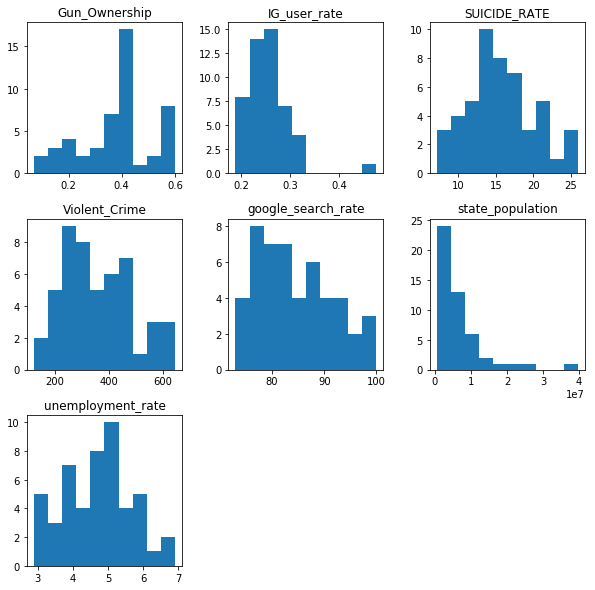

In [48]:
# Print histograms for each feature to see how they vary.
histohrams = data.hist(grid=False, figsize=(10, 10))

<h1>Google Searches for Suicide by State</h1>

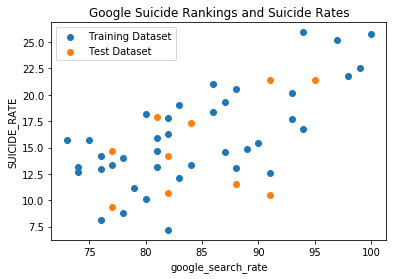

In [15]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Decide what fields we want to process.
input_param_name = 'google_search_rate'
output_param_name = 'SUICIDE_RATE'

# Split training set input and output.
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

# Split test set input and output.
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

# Plot training data.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Google Suicide Rankings and Suicide Rates')
plt.legend()
plt.show()

In [16]:
# Set up linear regression parameters.
num_iterations = 500  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.01  # The size of the gradient descent step.
polynomial_degree = 0  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init linear regression instance.
linear_regression = LinearRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

# Print training results.
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

Initial cost: 205204.08
Optimized cost: 8314.21


,Model Parameters
0,15.879589
1,3.657912


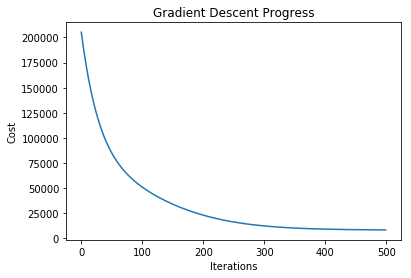

In [17]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

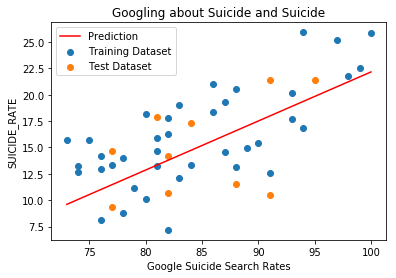

In [18]:
# Get model predictions for the trainint set.
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Google Suicide Search Rates')
plt.ylabel('SUICIDE_RATE')
plt.title('Googling about Suicide and Suicide')
plt.legend()
plt.show()

<h1>Googling Suicide and Suicide Rates R = .65 P = .000004</h1>

In [20]:
test_predictions = linear_regression.predict(x_test)

test_predictions_table = pd.DataFrame({
    'Google Suicide Searches': x_test.flatten(),
    'Test Suicide Rate': y_test.flatten(),
    'Predicted Suicide Rate': test_predictions.flatten(),
    'Prediction Diff': (y_test - test_predictions).flatten()
})

test_predictions_table.head(10)

,Google Suicide Searches,Test Suicide Rate,Predicted Suicide Rate,Prediction Diff
0,91,10.5,19.748586,-9.248586
1,88,11.5,17.876490,-6.376490
2,91,21.4,19.748586,1.651414
3,82,10.7,14.132300,-3.432300
4,81,17.9,13.508268,4.391732
5,77,9.4,11.012141,-1.612141
6,95,21.4,22.244713,-0.844713
7,82,14.2,14.132300,0.067700
8,84,17.3,15.380363,1.919637
9,77,14.7,11.012141,3.687859


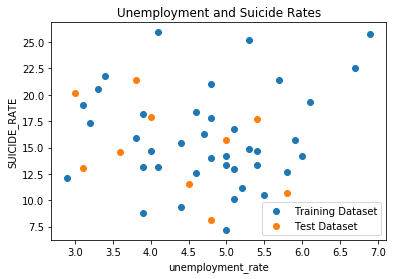

In [31]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Decide what fields we want to process.
input_param_name = 'unemployment_rate'
output_param_name = 'SUICIDE_RATE'

# Split training set input and output.
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

# Split test set input and output.
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

# Plot training data.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Unemployment and Suicide Rates')
plt.legend()
plt.show()

In [32]:
# Set up linear regression parameters.
num_iterations = 500  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.01  # The size of the gradient descent step.
polynomial_degree = 0  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init linear regression instance.
linear_regression = LinearRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

# Print training results.
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

Initial cost: 205140.83
Optimized cost: 15984.23


,Model Parameters
0,15.831191
1,1.028421


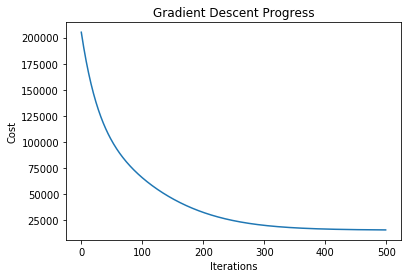

In [33]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

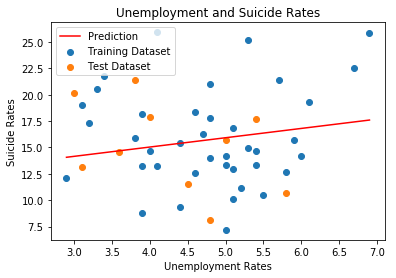

In [34]:
# Get model predictions for the trainint set.
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Unemployment Rates')
plt.ylabel('Suicide Rates')
plt.title('Unemployment and Suicide Rates')
plt.legend()
plt.show()

<h1>Unemployment Rate and Suicide R value = .03</h1>

In [35]:
test_predictions = linear_regression.predict(x_test)

test_predictions_table = pd.DataFrame({
    'Unemployment Rate': x_test.flatten(),
    'Test Suicide Rate': y_test.flatten(),
    'Predicted Suicide Rate': test_predictions.flatten(),
    'Prediction Diff': (y_test - test_predictions).flatten()
})

test_predictions_table.head(10)

,Unemployment Rate,Test Suicide Rate,Predicted Suicide Rate,Prediction Diff
0,5.4,17.7,17.080462,0.619538
1,4.5,11.5,16.058331,-4.558331
2,3.8,21.4,15.263340,6.136660
3,5.8,10.7,17.534743,-6.834743
4,3.6,14.6,15.036200,-0.436200
5,4.0,17.9,15.490481,2.409519
6,3.1,13.1,14.468349,-1.368349
7,4.8,8.1,16.399042,-8.299042
8,5.0,15.7,16.626182,-0.926182
9,3.0,20.2,14.354779,5.845221


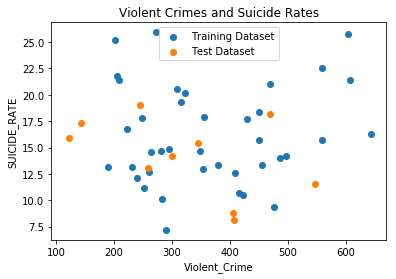

In [36]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Decide what fields we want to process.
input_param_name = 'Violent_Crime'
output_param_name = 'SUICIDE_RATE'

# Split training set input and output.
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

# Split test set input and output.
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

# Plot training data.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Violent Crimes and Suicide Rates')
plt.legend()
plt.show()

In [37]:
# Set up linear regression parameters.
num_iterations = 500  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.01  # The size of the gradient descent step.
polynomial_degree = 0  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init linear regression instance.
linear_regression = LinearRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

# Print training results.
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

Initial cost: 211147.53
Optimized cost: 16259.38


,Model Parameters
0,16.070633
1,0.972863


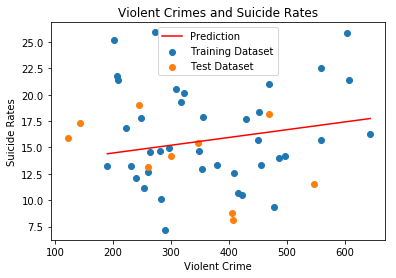

In [38]:
# Get model predictions for the trainint set.
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Violent Crime')
plt.ylabel('Suicide Rates')
plt.title('Violent Crimes and Suicide Rates')
plt.legend()
plt.show()

<h1>Violent Crimes Rates and Suicide R = .02 - No correlation</h1>

In [39]:
test_predictions = linear_regression.predict(x_test)

test_predictions_table = pd.DataFrame({
    'Violent Crimes (per 100000)': x_test.flatten(),
    'Test Suicide Rate': y_test.flatten(),
    'Predicted Suicide Rate': test_predictions.flatten(),
    'Prediction Diff': (y_test - test_predictions).flatten()
})

test_predictions_table.head(10)

,Violent Crimes (per 100000),Test Suicide Rate,Predicted Suicide Rate,Prediction Diff
0,469.1,18.2,17.152496,1.047504
1,547.4,11.5,17.737751,-6.237751
2,345.7,15.4,16.230139,-0.830139
3,122.7,15.9,14.563320,1.336680
4,405.5,8.8,16.677116,-7.877116
5,259.4,13.1,15.585088,-2.485088
6,406.8,8.1,16.686833,-8.586833
7,244.7,19.0,15.475212,3.524788
8,299.7,14.2,15.886311,-1.686311
9,142.6,17.3,14.712063,2.587937


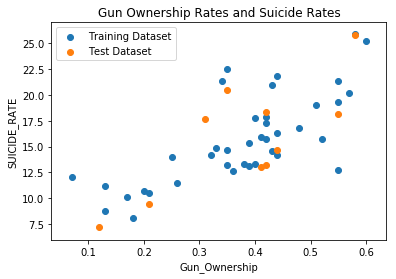

In [60]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Decide what fields we want to process.
input_param_name = 'Gun_Ownership'
output_param_name = 'SUICIDE_RATE'

# Split training set input and output.
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

# Split test set input and output.
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

# Plot training data.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Gun Ownership Rates and Suicide Rates')
plt.legend()
plt.show()

In [61]:
# Set up linear regression parameters.
num_iterations = 500  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.01  # The size of the gradient descent step.
polynomial_degree = 0  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init linear regression instance.
linear_regression = LinearRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

# Print training results.
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

Initial cost: 198117.45
Optimized cost: 6758.42


,Model Parameters
0,15.647789
1,3.643909


Text(0.5, 1.0, 'Gradient Descent Progress')

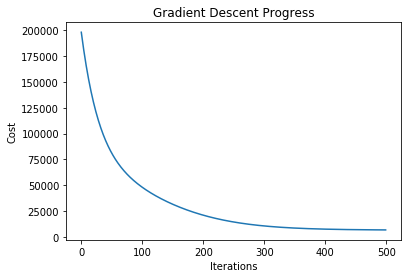

In [64]:
#Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
#plt.show()

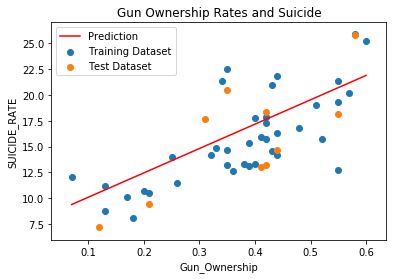

In [65]:
# Get model predictions for the trainint set.
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Gun_Ownership')
plt.ylabel('SUICIDE_RATE')
plt.title('Gun Ownership Rates and Suicide')
plt.legend()
plt.show()

<h1>R value = .73 
 P value = .0000000016</h1>

In [67]:
test_predictions = linear_regression.predict(x_test)

test_predictions_table = pd.DataFrame({
    'Gun Ownership': x_test.flatten(),
    'Test Suicide Rate': y_test.flatten(),
    'Predicted Suicide Rate': test_predictions.flatten(),
    'Prediction Diff': (y_test - test_predictions).flatten()
})

test_predictions_table.head(10)

,Gun Ownership,Test Suicide Rate,Predicted Suicide Rate,Prediction Diff
0,0.58,25.8,21.069389,4.730611
1,0.31,17.7,13.713449,3.986551
2,0.55,18.2,20.252062,-2.052062
3,0.35,20.5,14.803218,5.696782
4,0.21,9.4,10.989026,-1.589026
5,0.42,13.2,16.710313,-3.510313
6,0.42,18.4,16.710313,1.689687
7,0.12,7.2,8.537046,-1.337046
8,0.41,13.0,16.437871,-3.437871
9,0.44,14.7,17.255198,-2.555198
